In [1]:
# Load packages
import os
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt

# Verify Opencv version
print('OpenCV version: ' + cv2.__version__)

OpenCV version: 3.1.0


In [2]:
# Define functions
# Function: grep function
def grep(l, s):
    return [i for i in l if s in i]

# Function: Dense SIFT function
def dense_sift(gray_img, step_size):
    # SIFT calculator
    sift = cv2.xfeatures2d.SIFT_create()
    # Define step size
    kp = [cv2.KeyPoint(x, y, step_size) for y in range(0, gray_img.shape[0], step_size)
                                        for x in range(0, gray_img.shape[1], step_size)]
    kp, desc = sift.compute(gray_img, kp)
    return kp, desc

# Function: Extract features per variety
def featExtraction_perClass(path):
    
    print('Read images and convert them to gray format\n')
    img_list = os.listdir(path)
    img_list = grep(img_list, '.jpg')
    bgr_imgs = [cv2.imread(file) for file in glob.glob(path + "/*.jpg")]
    gry_imgs = bgr_imgs
    for i in range(0, len(bgr_imgs)):
        gry_imgs[i] = cv2.cvtColor(bgr_imgs[i], cv2.COLOR_BGR2GRAY) # 0.299*R + 0.587*G + 0.114*B
    
    print('Apply dense SIFT over individualized images\n')
    img_kp   = [None]*len(gry_imgs)
    img_desc = [None]*len(gry_imgs)
    for i in range(0, len(gry_imgs)):
        img_kp[i], img_desc[i] = dense_sift(gry_imgs[i], step_size = 8)
    
    print('Reshaping extracted SIFT features\n')
    descriptors = np.reshape(img_desc, (img_desc[0].shape[0]*len(img_desc), 128))
    descriptors = np.float32(descriptors)
    
    print('Returning extracted features\n')
    return(descriptors)

In [3]:
# List varieties' directories
root = '/Users/haachicanoy/Documents/Data/Computer_vision/clear_bckg/_img_sgmn'
paths = [ path for path in os.listdir(root) if os.path.isdir(os.path.join(root, path)) ]
for i in range(0, len(paths)):
    paths[i] = root + '/' + paths[i]

# Obtain images features for all available varieties
varieties_features = []
for i in range(0, len(paths)):
    varieties_features.append([])
    varieties_features[i].append(featExtraction_perClass(paths[i]))

Read images and convert them to gray format

Apply dense SIFT over individualized images

Reshaping extracted SIFT features

Returning extracted features

Read images and convert them to gray format

Apply dense SIFT over individualized images

Reshaping extracted SIFT features

Returning extracted features

Read images and convert them to gray format

Apply dense SIFT over individualized images

Reshaping extracted SIFT features

Returning extracted features

Read images and convert them to gray format

Apply dense SIFT over individualized images

Reshaping extracted SIFT features

Returning extracted features

Read images and convert them to gray format

Apply dense SIFT over individualized images

Reshaping extracted SIFT features

Returning extracted features

Read images and convert them to gray format

Apply dense SIFT over individualized images

Reshaping extracted SIFT features

Returning extracted features

Read images and convert them to gray format

Apply dense SIFT over ind

In [4]:
nrows = []
for i in range(0, len(varieties_features)):
    nrows.append([])
    nrows[i].append(varieties_features[i][0].shape[0])

nrows = [val for sublist in nrows for val in sublist]
varieties_features = [val for sublist in varieties_features for val in sublist]
varieties_features = [val for sublist in varieties_features for val in sublist]

all_feat = np.reshape(varieties_features, (sum(nrows), 128))
all_feat = np.float32(all_feat)

In [5]:
print(len(varieties_features))

372307


In [6]:
temp, classified_points, means = cv2.kmeans(data = all_feat,
                                            K = 1000,
                                            bestLabels = None,
                                            criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_MAX_ITER, 1, 20),
                                            attempts = 10,
                                            flags = cv2.KMEANS_RANDOM_CENTERS)

In [7]:
print(means)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 2. 53.  6. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


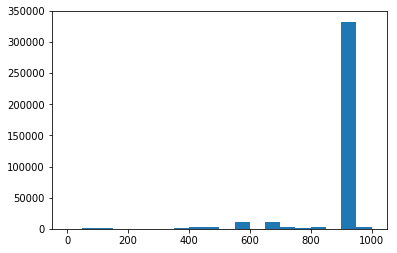

In [8]:
plt.hist(classified_points, bins = 'auto')
plt.show()